<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/HW/HW4.5/class_10_16_FitLinetoGRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from matplotlib import pylab as pl


import numpy as np

In [5]:

grbAG = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv')

grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [6]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


In [7]:
# #^we have NaN values
# #mag and log 10 of photons. but inverse means it is fainter

# #no uncertainty? bc of upperlimit

# #create a figure container and an axis object inside of it
# ax = pl.figure(figsize=(10,10)).add_subplot(111)

# #loop on every filter to plot - this will give differnt colors naturally.
# #Use pl.errorbar to plot the uncertainties

# for f in grbAG["filter"].unique():
#     pl.errorbar(np.log10(grbAG.loc[grbAG["filter"] == f, "time"]),
#                 grbAG.loc[grbAG["filter"] == f, "mag"],
#                 yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
#                 fmt='.', ms=0,
#                 fcolor=None, label=None)

# # replot to add a better marker (optional)
# for f in grbAG["filter"].unique():
#     pl.scatter(np.log10(grbAG.loc[grbAG["filter"] == f, "time"]),
#                grbAG.loc[grbAG["filter"] == f, "mag"],
#                alpha=1, s=100, linewidth=2,
#                label=f,
#                edgecolor='#cccccc')


# # plot the upperlimits as arrows
# nuplim = grbAG.mag.isna().sum()
# for i in grbAG[grbAG.upperlimit == 1].index:
#     pl.arrow(np.log10(grbAG.loc[i].time),
#              grbAG.loc[i].magerr, 0, 2,
#             head_width=0.05, head_length=0.1, ec='k')

# # I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
# pl.ylim(24,11.7)
# pl.legend()

# #Always rememebr you axis labels!!
# pl.ylabel("magnitude", fontsize=20)
# pl.xlabel("log time", fontsize=20);

In [8]:
#plot x-axis in log

#magnitude is already logged
#bring into log scale

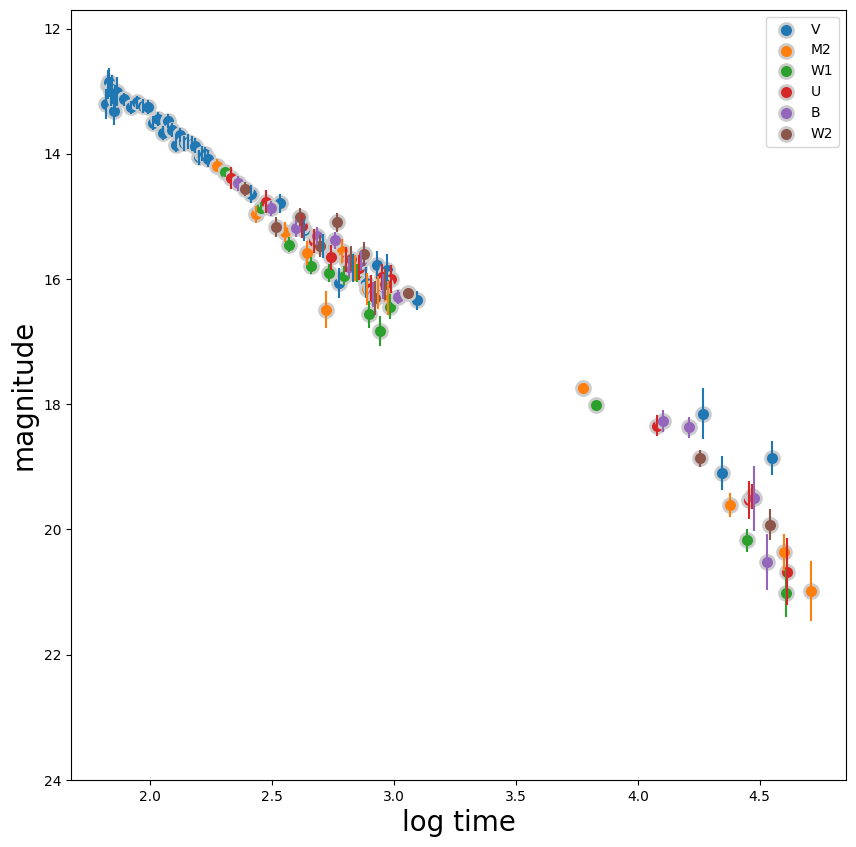

In [9]:
# grbAG_new = (grbAG['upperlimit']==1)
grbAG = grbAG[grbAG['upperlimit']==0]

#^also can try with drop

#now plot again without upperlimits


ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(np.log10(grbAG.loc[grbAG["filter"] == f, "time"]),
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(np.log10(grbAG.loc[grbAG["filter"] == f, "time"]),
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(np.log10(grbAG.loc[i].time),
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
#therefore it is inverted here so that the larger, is brighter instead. for the linear regression
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 1: A scatterplot of the measured magnitude as a function of logtime. The filter colors are indicated in the plot. The y-axis was made to a log scale so that we can get a linear approximation.

In [10]:
#btw it's a bad idea to (prev) work with values at 10^6 that big, bc can lead to:
#NUMERICAL INSTABILITIES

#now apply analytic solution

x = np.log10(grbAG['time'].values)
#^in lecture it's already made as grbAG['logtime'].values


X = np.c_[np.ones(len(x)), x]
y = grbAG['mag'].values

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

theta_best


array([8.58266823, 2.51199984])

In [11]:
np.c_?


In [12]:
print("the best fit parameters from the Normal Equation are intercept: {0:.2f} slope: {01:.2f}".format(*theta_best))

#* makes a pointer of some data. reverses address. takes the objects. Noice.

the best fit parameters from the Normal Equation are intercept: 8.58 slope: 2.51


In [13]:
#using Linear Regression - Scikit

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones(len(x)), x]
lr.fit(X, y)
lr.coef_, lr.intercept_


#we're solving the linear algebra normal equation

print("the best fit parameters from SKlearn are intercept:{0:.2f} slope: {1:.2f}".format(lr.intercept_, lr.coef_[1]))

the best fit parameters from SKlearn are intercept:8.58 slope: 2.51


In [14]:
lr.coef_, lr.intercept_

m = lr.coef_[1]
b = lr.intercept_
#remember what does this do

#set s?
s = 0.5

In [15]:
lr?

#X os 2-D version of x

In [16]:
from scipy.optimize import minimize

def line(x, m, b):
  f = []
  for i in range(len(x)):

    f = np.append(f, m*x[i] + b)

  return f #prediction in correspondence with X-values. same size vector as input you gave it.
  #y values corresponding to x values


def of_l1(args, x, y): #Objective Function
  a, b = args
  L_1 = 0
  #the minimize fn is not going to take it unless it's a scalar array. therefore, use numpy.
  #^TypeError: only integer scalar arrays can be converted to a scalar index with 1D numpy indices array

  #see optimization slides. on Objective Function
  # for i in range(x):
    # L_1 += abs(f-y)
  L_1 = np.sum(np.absolute(y - line(x, a, b)))
    #can also use sum() function
  return L_1

def of_l2(args, x, y):
  a, b = args
  # L_2 = 0
  # for i in range(x):
  L_2 = np.sum((y - line(x, a, b))**2)
  return L_2

def of_chi2(args, x, y, s):
  a, b = args
  # chi2 = 0
  # for i in range(x):
  chi2 = np.sum(((y - line(x, a, b))**2)/s**2)
  return chi2



#to change to L_2, sqaure it
#to change to Chi-squared, divide by the variance

#then call minimize fn

In [17]:
minimize?

Text(0, 0.5, 'magnitude')

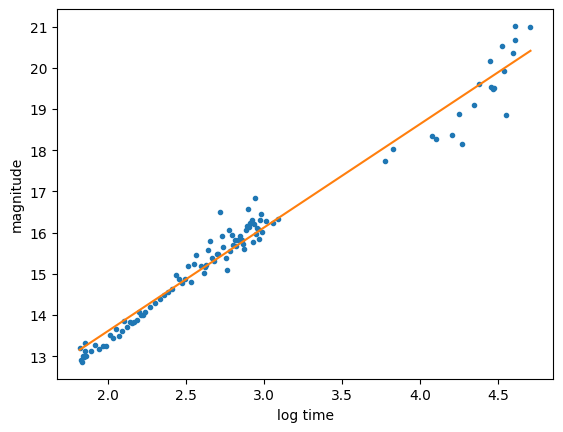

In [18]:
# #line
f = line(x, m=m, b=b)

pl.plot(x, y, '.')
pl.plot(x,f )

pl.xlabel("log time")
pl.ylabel("magnitude")


Figure 2. A scatterplot of the logtime and magnitude values of measurement, as well as the calculated "best fit" line. Note that the magnitude in this measure is already "inverted" so that brighter is larger. Qualitatively, we can see here that the scatterplot roughly follows the fit line. However, we are going to see whether it applies quantitatively.

In [19]:
initialGuess = (10, 1)
#l1Solution = minimize(of, initialGuess, args=(x,y))
#revise of function.

#SGD

#and then plot again

#next:
#so we looked at training and testing
#LR with skit learn

#so,
#do the same but seperate data for training and testing

from sklearn.model_selection import train_test_split

train_test_split?

In [20]:

# x_train, x_test, y_train, y_test, s_train, s_test = train_test_split(
#      x, y, s, test_size=0.25, random_state=42)

#for L1: x_train, x_test, y_train, y_test= train_test_split(
x_trainl1, x_testl1, y_trainl1, y_testl1= train_test_split(
     x, y, test_size=0.25, random_state=42)

initialGuess = (10, 1)

l1Solution_goodsplit = minimize(of_l1, initialGuess,
	args=(x_trainl1, y_trainl1))

print("best fit parameters from the minimization of the L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution_goodsplit.x))

l1Solution_badsplit = minimize(of_l1, initialGuess,
	args=(x_testl1, y_testl1))


#for L2:

x_trainl2, x_testl2, y_trainl2, y_testl2= train_test_split(
     x, y, test_size=0.25, random_state=42)

initialGuess = (10, 1)

l2Solution_goodsplit = minimize(of_l2, initialGuess,
	args=(x_trainl2, y_trainl2))

print("best fit parameters from the minimization of the L2: " +
       "slope {:.2f}, intercept {:.2f}".format(*l2Solution_goodsplit.x))

l2Solution_badsplit = minimize(of_l2, initialGuess,
	args=(x_testl2, y_testl2))


#for chi2:

# x_trainchi2, x_testchi2, y_trainchi2, y_testchi2, s_trainchi2, s_testchi2= train_test_split(
#      x, y, s, test_size=0.25, random_state=42)

# initialGuess = (10, 1)

# l1Solution_goodsplit = minimize(of_chi2, initialGuess,
# 	args=(x_trainchi2, y_trainchi2, s_trainchi2))

# print("best fit parameters from the minimization of the L1: " +
#        "slope {:.2f}, intercept {:.2f}".format(*l1Solution_goodsplit.x))

# l1Solution_badsplit = minimize(of_chi2, initialGuess,
# 	args=(x_testchi2, y_testchi2, s_test_chi2))


# x_trainchi2, x_testchi2, y_trainchi2, y_testchi2, s_trainchi2, s_testchi2 = train_test_split(
#      x, y, s, test_size=0.25, random_state=42)

# initialGuess = (10, 1)

# chi2Solution_goodsplit = minimize(chi2, initialGuess,
# 	args=(x_train, y_train, s_train))

# print("best fit parameters from the minimization of the chi squared: " +
#        "slope {:.2f}, intercept {:.2f}".format(*chi2Solution_goodsplit.x))

best fit parameters from the minimization of the L1: slope 2.57, intercept 8.40
best fit parameters from the minimization of the L2: slope 2.48, intercept 8.66


In [21]:
#now do Rsquared values
#from https://medium.com/@rachel.hwung/r-squared-explained-intuitively-734421d1a0d7#:~:text=Training%20R%2Dsquared%20vs%20Test,for%20the%20chosen%20test%20set.
#so Rsquared = 1 - (SSRES/SSTOT)

#https://www.investopedia.com/terms/r/r-squared.asp#:~:text=R%2Dsquared%20(R2),variable%20in%20a%20regression%20model.

#To calculate the total variance, you would subtract the average actual value from each of the actual values,
#square the results, and sum them. From there, divide the first sum of errors (unexplained variance) by the second sum (total variance),
#subtract the result from one, and you have the R-squared.

def Rsquare(args, x, y):
  a, b = args
  y_fit = line(x, a ,b)
  ssres = np.sum((y-y_fit)**2)
  sstot = np.sum((y-np.mean(y))**2)
  Rsq = 1 - (ssres/sstot)
  return Rsq

In [34]:
#another way for calculating R2 directily
X_trainl1, X_testl1, y_trainl1, y_testl1= train_test_split(
     X, y, test_size=0.25, random_state=42)

reg = LinearRegression()
fit = reg.fit(X_trainl1, y_trainl1)
score_trainl1 = fit.score(X_trainl1, y_trainl1)

fit = reg.fit(X_testl1, y_testl1)
score_testl1 = fit.score(X_testl1, y_testl1)

# print("Applying reg.score()")
# print("R square on training set (L1): ", score_trainl1)
# print("R square on test set (L1): ", score_testl1)
###

X_trainl2, X_testl2, y_trainl2, y_testl2= train_test_split(
     X, y, test_size=0.25, random_state=42)

fit = reg.fit(X_trainl2, y_trainl2)
score_trainl2 = fit.score(X_trainl2, y_trainl2)

fit = reg.fit(X_testl2, y_testl2)
score_testl2 = fit.score(X_testl2, y_testl2)

# print("Applying reg.score()")
# print("R square on training set (L2): ", score_trainl2)
# print("R square on test set (L2): ", score_testl2)





Applying reg.score()
R square on training set (L1):  0.9716992501494651
R square on test set (L1):  0.9742710333378128
Applying reg.score()
R square on training set (L2):  0.9716992501494651
R square on test set (L2):  0.9742710333378128


Applying reg.score()
R square on training set (L1):  0.9716992501494651
R square on test set (L1):  0.9742710333378128
 
Calculated manually:
R square on training set (L1):  0.9705836725696545
R square on test set (L1):  0.9718499061534975


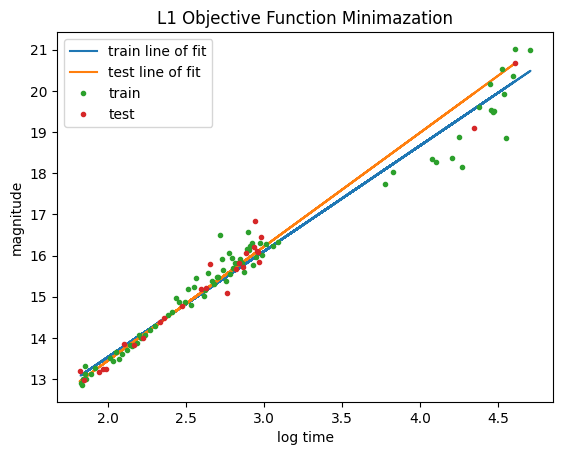

In [35]:
#for L1
print("Applying reg.score()")
print("R square on training set (L1): ", score_trainl1)
print("R square on test set (L1): ", score_testl1)
print(" ")
print("Calculated manually:")
print("R square on training set (L1): ", Rsquare(l1Solution_goodsplit.x, x_trainl1, y_trainl1))
print("R square on test set (L1): ", Rsquare(l1Solution_goodsplit.x, x_testl1, y_testl1))

pl.title("L1 Objective Function Minimazation")

pl.plot(x_trainl1, line(x=x_trainl1, m=l1Solution_goodsplit.x[0], b=l1Solution_goodsplit.x[1]), label='train line of fit')
pl.plot(x_testl1, line(x=x_testl1, m=l1Solution_badsplit.x[0], b=l1Solution_badsplit.x[1]), label='test line of fit')
pl.plot(x_trainl1, y_trainl1, '.', label = "train")
pl.plot(x_testl1, y_testl1, '.', label='test')

pl.xlabel("log time")
pl.ylabel("magnitude")

pl.legend()

pl.show()

# print(y_trainl1, y_trainl2)

#both have same parameters for the train and test

Figure 3: A scatterplot of the training and testing datapoints, as well as the corresponding "lines of fit" (as indicated in the legend) with the L1 objective function.

The R-square values seem to be high (above 0.97 for both training and test, and for both calculated manually and using reg.score()). The way I currently interpret this is that the closer the R-square value is to 1, the closer the scatterplots match to the "fit" line. Also seen qualitatively, the scatterplots also do seem to follow the "trend" of its corresponding line.

Applying reg.score()
R square on training set (L2):  0.9716992501494651
R square on test set (L2):  0.9742710333378128
 
Calculated manually
R square on training set (L2):  0.9716992501494645
R square on test set (L2):  0.9695582520390377


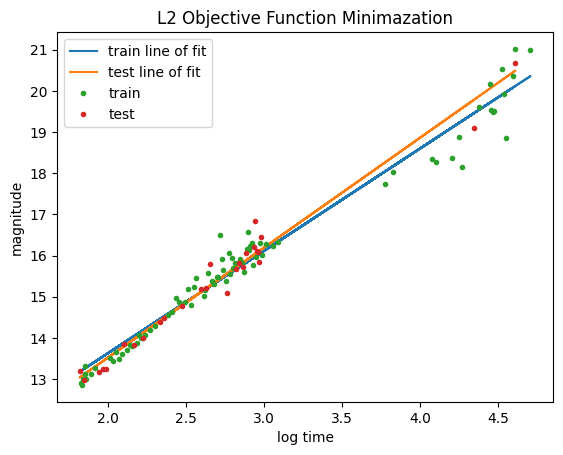

In [36]:
#plotting for test vs training in l2
# pl.plot(x, y, '.')
# pl.plot(x,f )

#for L2
print("Applying reg.score()")
print("R square on training set (L2): ", score_trainl2)
print("R square on test set (L2): ", score_testl2)
print(' ')
print("Calculated manually")
print("R square on training set (L2): ", Rsquare(l2Solution_goodsplit.x, x_trainl2, y_trainl2))
print("R square on test set (L2): ", Rsquare(l2Solution_goodsplit.x, x_testl2, y_testl2))


pl.title("L2 Objective Function Minimazation")

pl.plot(x_trainl2, line(x=x_trainl2, m=l2Solution_goodsplit.x[0], b=l2Solution_goodsplit.x[1]), label='train line of fit')
pl.plot(x_testl2, line(x=x_testl2, m=l2Solution_badsplit.x[0], b=l2Solution_badsplit.x[1]), label='test line of fit')
pl.plot(x_trainl2, y_trainl2, '.', label = "train")
pl.plot(x_testl2, y_testl2, '.', label='test')

pl.xlabel("log time")
pl.ylabel("magnitude")

pl.legend()

pl.show()


Figure 4: A similar figure as in Figure 3, but for the L2 objective function.

Compared to Figure 3, the fit lines do not seem to differ that much. There are, though, quite subtle differences between them. It is seen when we compute the R-square; the values calculated with reg.score() for L2 were the same as that in L2 (?). However, the manually calculated R-square shows slight difference from the previous function, though they still are quite high in value (around 0.97)